In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    '/kaggle/input/dataset-new/aug_dataset',
    target_size=(224, 224),
    batch_size=256,
    class_mode='sparse',
    subset='training'  
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/input/dataset-new/aug_dataset',
    target_size=(224, 224),
    batch_size=256,
    class_mode='sparse',
    subset='validation' 
)
print(train_generator.class_indices)

Found 34842 images belonging to 8 classes.
Found 8706 images belonging to 8 classes.
{'0': 0, '130': 1, '180': 2, '230': 3, '270': 4, '320': 5, '40': 6, '90': 7}


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224,3 ))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os


checkpoint_dir = '/kaggle/working/checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}_val_acc_{val_accuracy:.2f}.keras'),  
    monitor='val_accuracy',  
    save_best_only=True,  
    save_weights_only=False,  
    mode='max', 
    verbose=1
)


early_stopping_callback = EarlyStopping(
    monitor='val_loss',  
    patience=5,  
    restore_best_weights=True,
    verbose=1
)


tensorboard_callback = TensorBoard(
    log_dir='/kaggle/working/logs',  
    histogram_freq=1,  
    write_graph=True, 
    write_images=False  
)

In [6]:

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  
    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback]
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728631071.166763      80 service.cc:145] XLA service 0x78cea0001aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728631071.166829      80 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728631071.166833      80 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-11 07:18:05.301072: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng20{k2=0,k4=1,k5=1,k6=0,k7=0,k19=0} for conv (f32[256,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,64,224,224]{3

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5743 - loss: 2.0758

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.94590, saving model to /kaggle/working/checkpoints/model_epoch_01_val_acc_0.95.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 871s 6s/step - accuracy: 0.5756 - loss: 2.0677 - val_accuracy: 0.9459 - val_loss: 0.2082
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9099 - loss: 0.3105
Epoch 2: val_accuracy improved from 0.94590 to 0.95658, saving model to /kaggle/working/checkpoints/model_epoch_02_val_acc_0.96.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 689s 5s/step - accuracy: 0.9099 - loss: 0.3104 - val_accuracy: 0.9566 - val_loss: 0.1626
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9297 - loss: 0.2540
Epoch 3: val_accuracy improved from 0.95658 to 0.95762, saving model to /kaggle/working/checkpoints/model_epoch_03_val_acc_0.96.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 659s 5s/step - accuracy: 0.9297 - loss: 0.2540 - val_accuracy: 0.9576 - val_loss: 0.1556
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9352 - loss

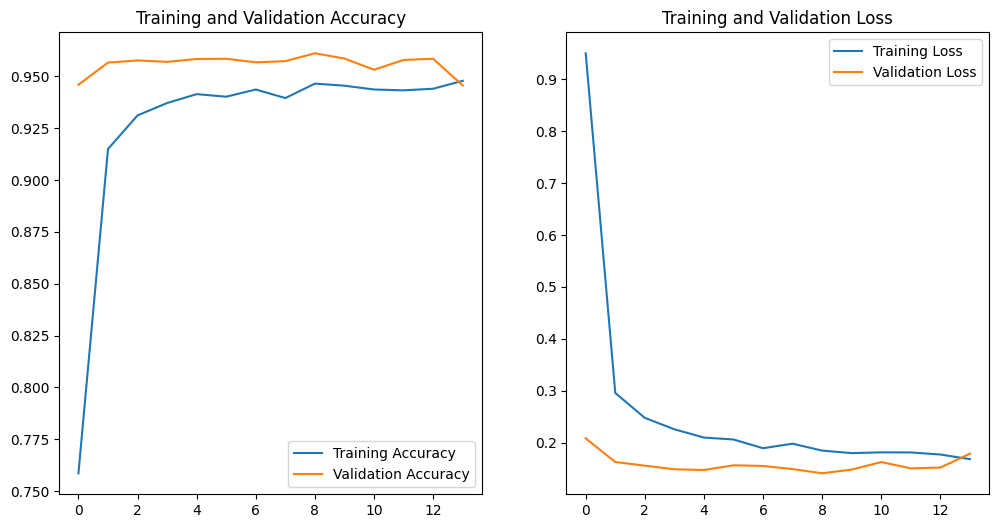

35/35 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step


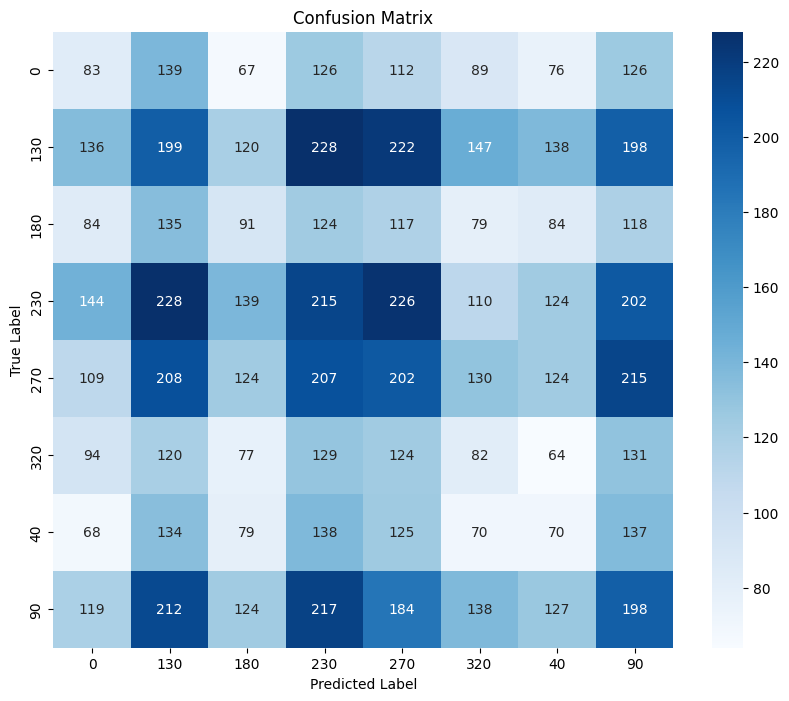

Classification Report
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       818
         130       0.14      0.14      0.14      1388
         180       0.11      0.11      0.11       832
         230       0.16      0.15      0.16      1388
         270       0.15      0.15      0.15      1319
         320       0.10      0.10      0.10       821
          40       0.09      0.09      0.09       821
          90       0.15      0.15      0.15      1319

    accuracy                           0.13      8706
   macro avg       0.12      0.12      0.12      8706
weighted avg       0.13      0.13      0.13      8706



In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_accuracy_and_loss(history)






from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
true_labels = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(true_labels, y_pred, target_names=target_names))


